<a href="https://colab.research.google.com/github/Tverdostup1993/Python_for_ds_tasks/blob/main/%D0%A2%D0%B2%D0%B5%D1%80%D0%B4%D0%BE%D1%81%D1%82%D1%83%D0%BF_%D0%9E_%D0%86_%22HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

medical_df = pd.read_csv("/content/drive/MyDrive/Machine Learning from 0 to Hero/Database/medical-charges (1).csv") # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

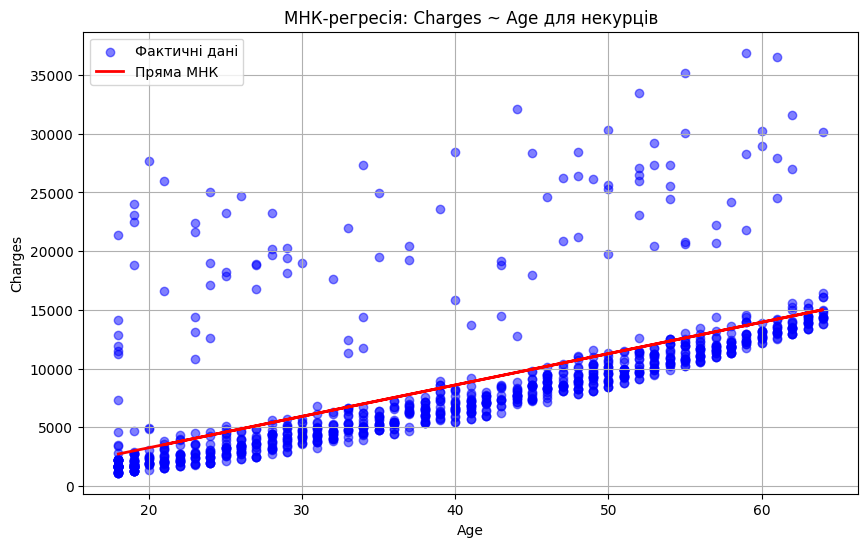

b (intercept): -2091.42
w (slope):     267.25
  RMSE: 21738960.02


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Підготовка змінних
X = non_smoker_df["age"].values.reshape(-1, 1)     # (n, 1)
y = non_smoker_df["charges"].values.reshape(-1, 1) # (n, 1)

# 2. Додаємо колонку одиниць — для врахування bias (перехоплення)
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

# 3. Функція МНК (нормальне рівняння)
def normal_equations(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

# 4. Розрахунок коефіцієнтів
MNK_coefs = normal_equations(X_with_intercept, y)

# 5. Прогноз
predictions_MNK = X_with_intercept.dot(MNK_coefs)

# 6. Візуалізація
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Фактичні дані')
plt.plot(X, predictions_MNK, color='red', linewidth=2, label='Пряма МНК')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('МНК-регресія: Charges ~ Age для некурців')
plt.legend()
plt.grid(True)
plt.show()

# 7. Вивід коефіцієнтів
print(f"b (intercept): {MNK_coefs[0][0]:.2f}")
print(f"w (slope):     {MNK_coefs[1][0]:.2f}")

# 8. Обчислюємо RMSE (корінь середньоквадратичної помилки)
rmse = mean_squared_error(y, predictions_MNK)
print(f"  RMSE: {rmse:.2f}")

In [ ]:
# 1. Підготовка даних
X = non_smoker_df["age"].values.reshape(-1, 1)  # (n, 1)
y= non_smoker_df["charges"].values.reshape(-1, 1)  # (n, 1)

# 3. Додаємо стовпчик одиниць для константи
X_b = np.hstack([np.ones_like(X), X])  # (n, 2)

In [ ]:
def stochastic_gradient_descent(X, y, lr=0.0001, epochs=100):
    m, b = 0.0, 0.0  # Initial parameters
    n = len(y)
    for _ in range(epochs):
        for i in range(n):
            x_i = X[i, 0]  # Assuming X is a 2D array with one feature column
            y_i = y[i]
            y_pred_i = m * x_i + b
            error_i = y_pred_i - y_i
            m_gradient = 2 * error_i * x_i
            b_gradient = 2 * error_i
            m -= lr * m_gradient
            b -= lr * b_gradient
    return m, b

m, b = stochastic_gradient_descent(X, y, lr=0.0001, epochs=5000)
predictions_sgd = m * X[:, 0] + b

# 8. Обчислюємо RMSE (корінь середньоквадратичної помилки)
rmse = mean_squared_error(y, predictions_sgd)
print(f"  RMSE: {rmse:.2f}")
print(m,b)

  RMSE: 22027697.42
257.1099241585827 -2210.1346888100024


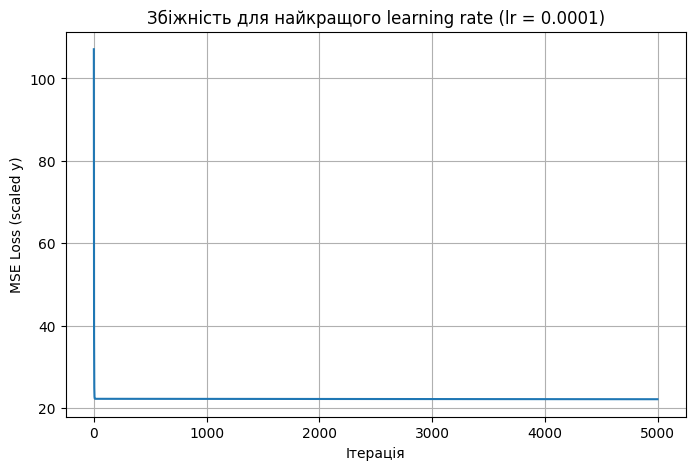

In [ ]:
# 1. Знайдемо найкращий learning rate за RMSE
best_lr = min(results, key=lambda lr: results[lr]["rmse"] if not np.isnan(results[lr]["rmse"]) else np.inf)
best_result = results[best_lr]

# 2. Побудова графіку збіжності (loss по ітераціях)
plt.figure(figsize=(8, 5))
plt.plot(best_result["loss_history"])
plt.xlabel("Ітерація")
plt.ylabel("MSE Loss (scaled y)")
plt.title(f"Збіжність для найкращого learning rate (lr = {best_lr})")
plt.grid(True)
plt.show()

In [ ]:
# 1. Конвертуємо X та y в NumPy масиви
X = non_smoker_df["age"].values.reshape(-1, 1)  # (n, 1)
y = non_smoker_df["charges"].values            # (n, )

# 2. Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.0001, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(np.mean(error ** 2))
        m_gradient = (2 / n) * np.dot(error, X[:, 0])
        b_gradient = (2 / n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

# 3. Запуск
m, b, errors = full_batch_gradient_descent(X, y, lr=0.0001, epochs=5000)
predictions_fbgd = m * X[:, 0] + b

rmse = mean_squared_error(y, predictions_fbgd)
print(f"  RMSE: {rmse:.2f}")
print(m,b)

  RMSE: 22135901.59
225.10036456939744 -219.44855828141417


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Готуємо X та y
X = non_smoker_df["age"].to_frame()   # дуже важливо: to_frame() → (n, 1)
y = non_smoker_df["charges"]

# 2. Створюємо та тренуємо модель
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# 3. Отримуємо коефіцієнти
b = lin_reg.intercept_
w = lin_reg.coef_[0]

# 4. Робимо прогноз
y_pred = lin_reg.predict(X)

# 5. Обчислюємо RMSE
rmse = mean_squared_error(y, y_pred)

# 6. Виводимо результат
print("Модель sklearn.linear_model.LinearRegression:")
print(f"  b (intercept): {b:.2f}")
print(f"  w (slope):     {w:.2f}")
print(f"  RMSE:          {rmse:.2f}")

Модель sklearn.linear_model.LinearRegression:
  b (intercept): -2091.42
  w (slope):     267.25
  RMSE:          21738960.02


In [ ]:
predictions_sklearn = lin_reg.predict(X)

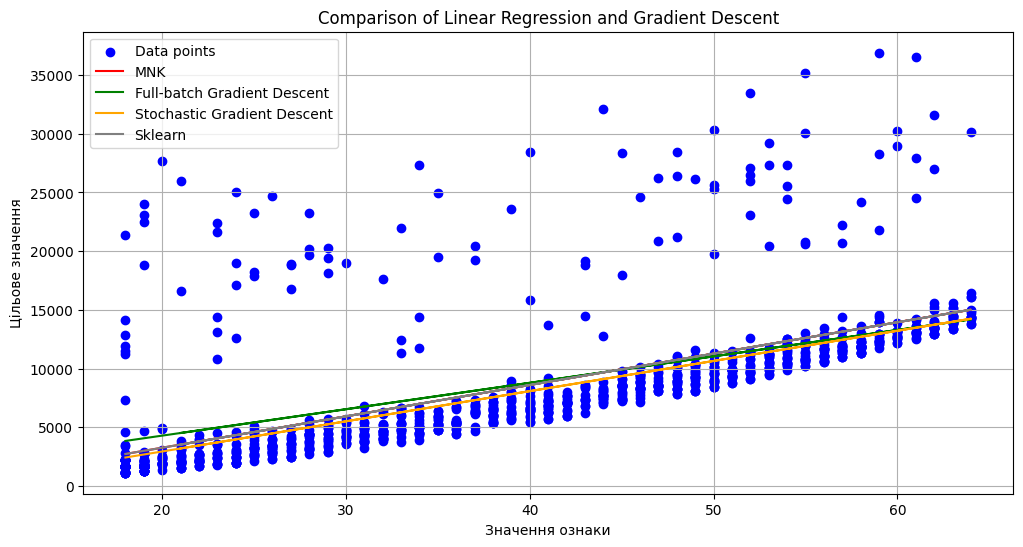

In [ ]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], predictions_sgd, color='orange', label='Stochastic Gradient Descent')
plt.plot(X[:, 0], predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

**Висновки** Всі моделі дали майже однакову пряму регресії, що свідчить про правильну реалізацію та лінійну природу залежності charges ~ age. Коефіцієнти, знайдені градієнтним спуском, практично збігаються з МНК і sklearn. Це означає, що модель добре відобразила залежність

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

Модель: LinearRegression (курці)
  Коефіцієнт w (slope):     305.24
  Перехоплення b (intercept): 20294.13
  RMSE: 114725592.72
  R²:   0.1356


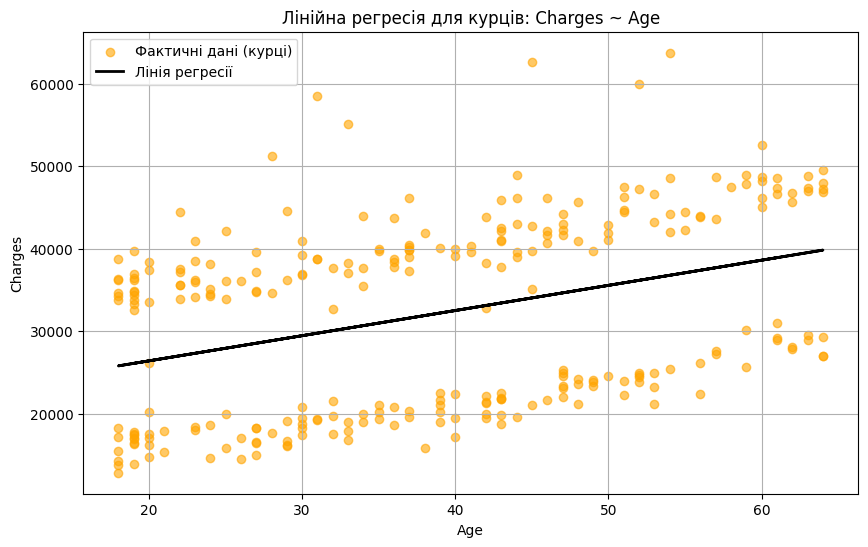

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 1. Вибірка лише для курців
smoker_df = medical_df[medical_df.smoker ==  "yes"]

# 2. Підготовка змінних
X = smoker_df["age"].values.reshape(-1, 1)             # (n, 1)
y = smoker_df["charges"].values                        # (n, )

# 3. Модель лінійної регресії
model = LinearRegression()
model.fit(X, y)

# 4. Прогноз
y_pred = model.predict(X)

# 5. Оцінка якості
r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred)

# 6. Вивід результатів
print("Модель: LinearRegression (курці)")
print(f"  Коефіцієнт w (slope):     {model.coef_[0]:.2f}")
print(f"  Перехоплення b (intercept): {model.intercept_:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R²:   {r2:.4f}")

# 7. Візуалізація
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='orange', alpha=0.6, label="Фактичні дані (курці)")
plt.plot(X, y_pred, color='black', linewidth=2, label="Лінія регресії")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Лінійна регресія для курців: Charges ~ Age")
plt.legend()
plt.grid(True)
plt.show()

**Висновок**  Побудована лінійна модель charges ~ age для курців показує низький рівень пояснюваності залежності: коефіцієнт детермінації R² становить лише 0.1356, тобто віком можна пояснити лише близько 13.5% варіації медичних витрат. RMSE ≈ 11 472 грн свідчить про високу середню похибку прогнозу, а графік із сильно розкиданими точками навколо прямої підтверджує слабкий лінійний зв’язок. Через це модель не є достатньо надійною для використання в бізнесі без доповнення іншими значущими факторами